# **DIWALI SALES ANALYSIS**

In [2]:
#IMOPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing csv file
df = pd.read_csv("Diwali Sales Data.csv",encoding= 'unicode_escape')

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
# NULL VALUES
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [6]:
#  DROPING NULL VALUES COLUMNS
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [23]:
df.shape

(11239, 13)

In [24]:
# DROP NULL VALUES ROWS
df.dropna(inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [26]:
# CHANGING DATA TYPE
df["Amount"]= df["Amount"].astype(int)
df["Amount"].dtype

dtype('int64')

In [27]:
# DESCRIBING COLUMNS[Age ,ORDERS , AMOUNT] (i.e = count,mean,median etc) 
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## **EXPLORATORY DATA ANALYSIS**

### **GENDER**

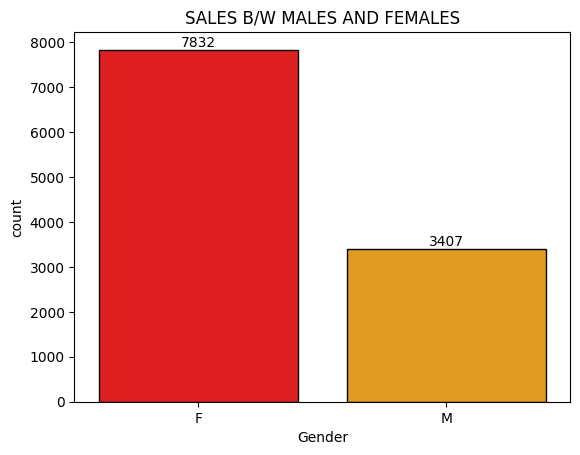

In [80]:
# SALES b/w MALE and FEMALE

a = sns.countplot(data= df,x="Gender",hue = "Gender", palette={"M": "orange", "F": "red"},edgecolor ="black")
for bars in a.containers:
    a.bar_label(bars)
plt.title("SALES B/W MALES AND FEMALES")
plt.show()

In [28]:
group = df.groupby(["Gender"],as_index = False)["Amount"].sum().sort_values(by="Amount",ascending = False)
group

,Gender,Amount
0,F,74335853
1,M,31913276


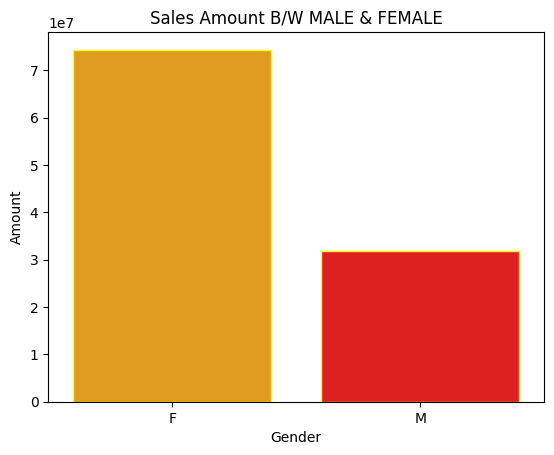

In [30]:
# SALES AMOUNT B/W MALES AND FEMALES

sns.barplot(data= group,x="Gender",y="Amount",hue ="Gender", palette={"F":"orange","M":"red"},edgecolor="yellow")
plt.title("Sales Amount B/W MALE & FEMALE")
plt.show()

***FROM THE ABOVE GRAPHS WE CAN SEE THAT NUMBER OF BUYERS ARE MOST OF FEMALES AND IN TERMS OF PURCHASING POWER FEMALES ARE GREATER THAN MALES***

### AGE

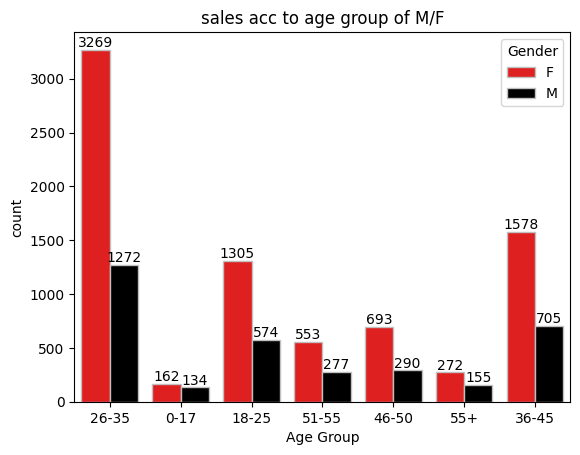

In [166]:
# SALES ACC. TO DIFF AGE GROUP B/W MALES AND FEMALES

x =sns.countplot(data= df, x="Age Group",hue="Gender",palette = {"M":"black","F":"red"},edgecolor="silver")
plt.title("sales acc to age group of M/F")

for bar in x.containers:
    x.bar_label(bar)

plt.show()

In [140]:
# AGE GROUP v/s TOTAL AMOUNT

group1 = df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=True)
group1

,Age Group,Amount
0,0-17,2699653
6,55+,4080987
5,51-55,8261477
4,46-50,9207844
1,18-25,17240732
3,36-45,22144994
2,26-35,42613442


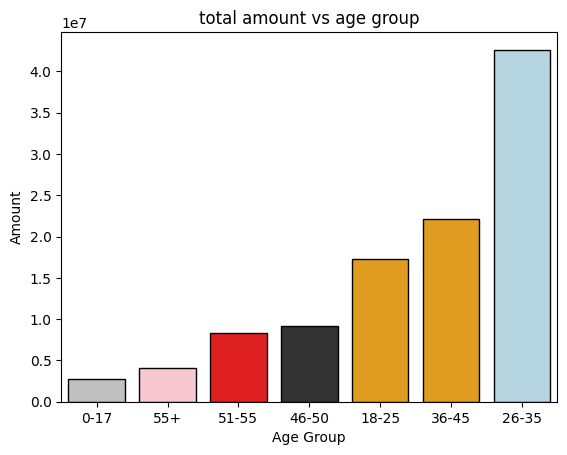

In [165]:
sns.barplot(data=group1,x="Age Group",y="Amount",hue="Age Group",palette=["silver","pink","red","#333333","orange","orange","lightblue"],edgecolor="black")
plt.title("total amount vs age group")
plt.show()


***FROM THE ABOVE GRAPHS WE CAN SEE THAT MOST OF BUYERS ARE OF AGE GROUP 26-35 AND ARE MOST OF FEMALES***

### STATE

In [173]:
# TOP 10 STATES ACC TO NO. OF ORDERS

states = df.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
states

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


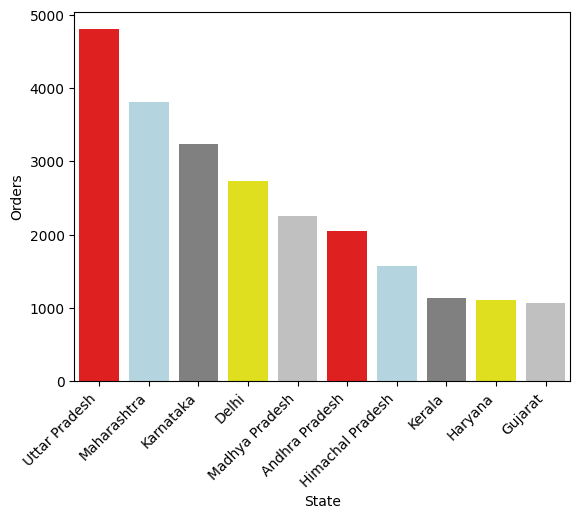

In [190]:
sns.barplot(data=states,x="State",y="Orders",hue="State",
            palette=["red","lightblue","grey","yellow","silver","red","lightblue","grey","yellow","silver"])

plt.xticks(rotation=45, ha='right')
plt.show()

In [195]:
# total amount/slales from top 10 states

group2=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
group2

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


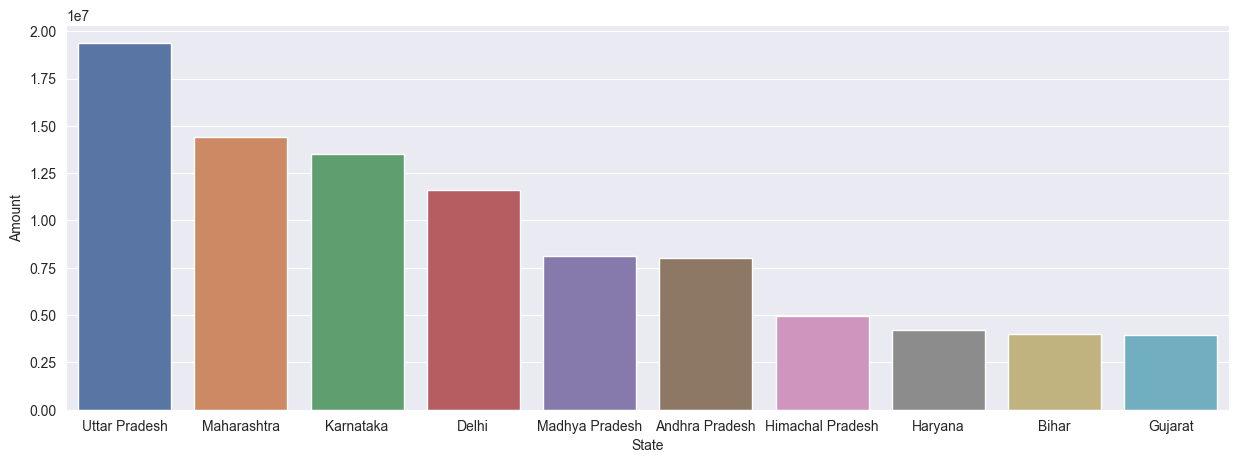

In [202]:
sns.barplot(data=group2,x="State",y="Amount",hue="State")
sns.set(rc={"figure.figsize":(15,5)})
plt.show()

***FROM THE ABOVE GRAPHS WE CAN SEE THAT UTTAR PRADESH,MAHARASHTRA,KARNATAKA RESPECTIVELY HAVE MAXIMUM IN TERMS OF NO. OF ORDERS AND IN MAX. SALES AMOUNT***

### MARITAL STATUS

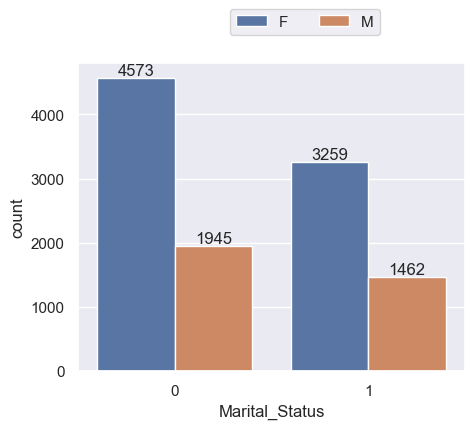

In [215]:
# NO. OF BUYERS ACC TO MARITAL STATUS

f=sns.countplot(data= df,x='Marital_Status',hue="Gender")
sns.set(rc={"figure.figsize":(5,4)})
plt.legend(bbox_to_anchor=(0.8,1.2),ncols=2)
for bar in f.containers:
    f.bar_label(bar)
plt.show()

***FROM THE ABOVE GRAPH WE CAN SEE THAT MOST OF BUYERS ARE MARRIED(FEMALES)***

### OCCUPATION 

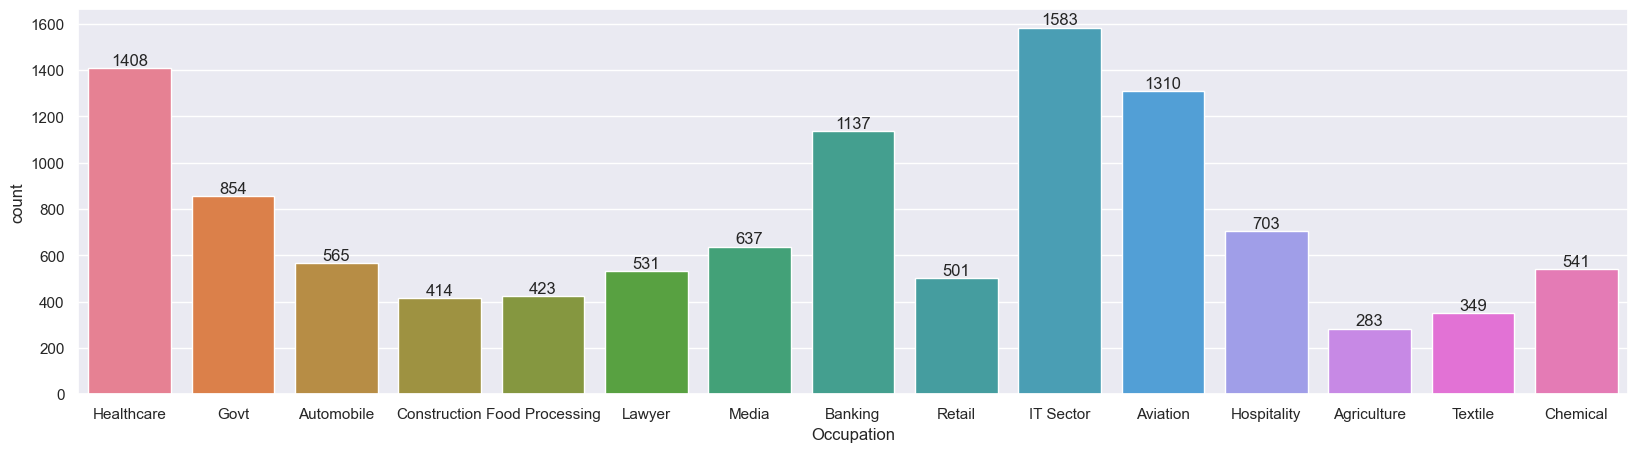

In [234]:
# NO OF ORDERS ACC TO OCCUPATION 

R= sns.countplot(data=df,x="Occupation",hue="Occupation")
sns.set(rc={"figure.figsize":(20,5)})
for bar in R.containers:
    R.bar_label(bar)
plt.show()

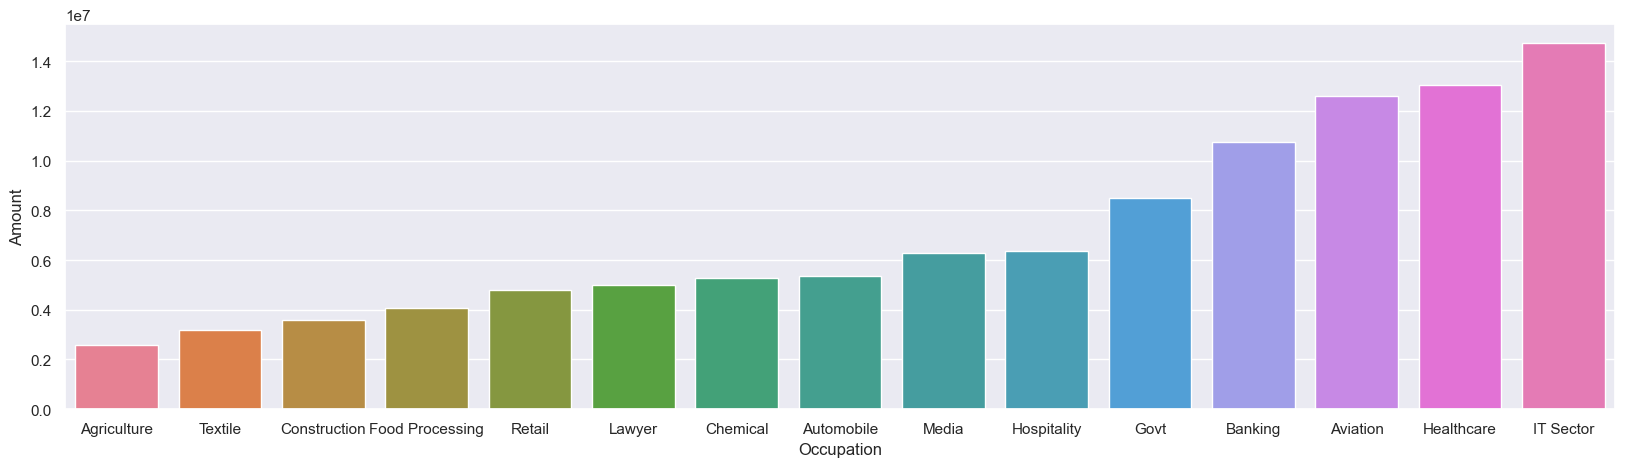

In [237]:
# TOTAL AMOUNT/SALES ACC TO OCCUPATION

group3 = df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=True)
sns.barplot(data=group3,x="Occupation",y="Amount",hue="Occupation")
plt.show()


***FROM THE ABOVE GRAPHS WE CAN SEE THAT MOST OF BUYERS ARE WORKING IN IT SECTOR***

### PRODUCT CATEGORY

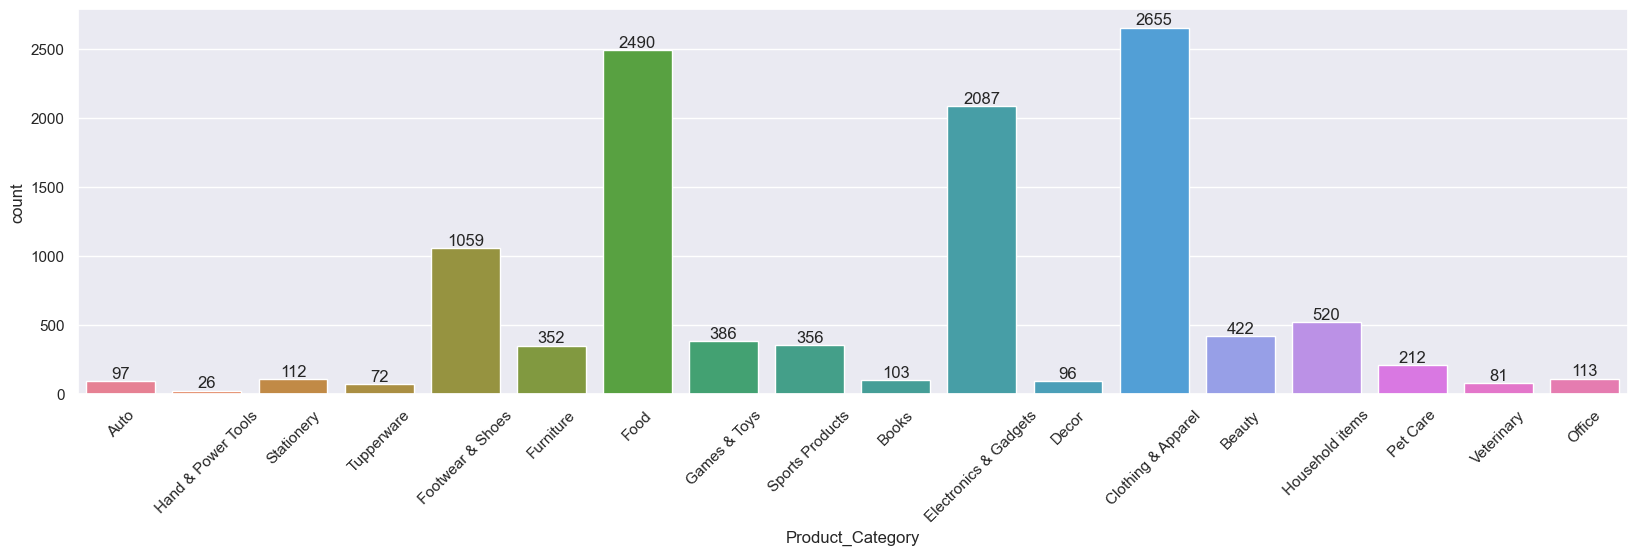

In [256]:
# NO OF ORDERS ACC TO PRODUCT
o=sns.countplot(data=df,x="Product_Category",hue="Product_Category")
sns.set(rc={"figure.figsize":(20,5)})
plt.xticks(rotation=45)

for bar in o.containers:
    o.bar_label(bar)
plt.show()


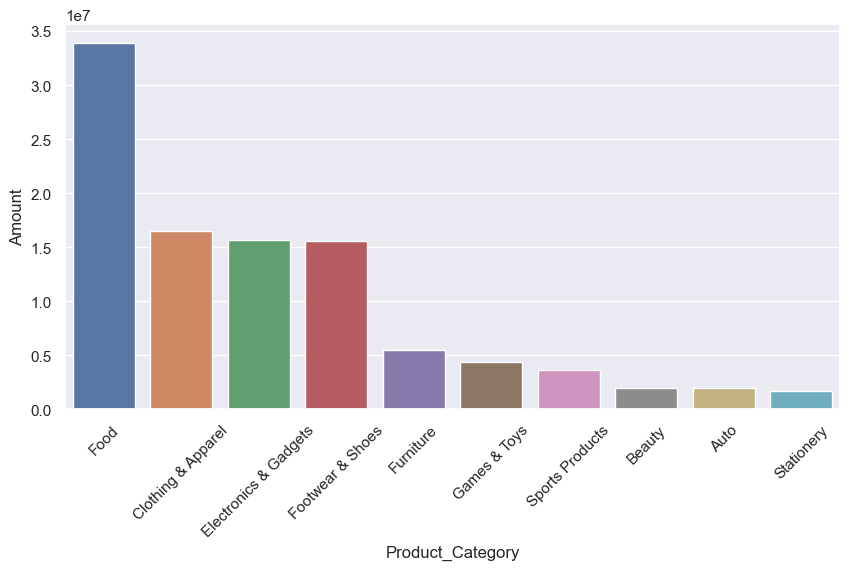

In [287]:
# total amount on basis of product_catogory
group4= df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.barplot(data=group4,x="Product_Category",y="Amount",hue="Product_Category")
sns.set(rc={"figure.figsize":(15,4)})
plt.xticks(rotation=45)
plt.show()

***FROM THE ABOVE GRAPHS WE CHN SEE THAT MOST OF SOLD PRODUCT ARE FOOD,CLOTHING,ELECTRONICS***

## CONCLUSION 

***Married Womens age group 26-35 yrs from UP,Maharashtra,Karnataka Working in IT and Health Care Are Most Likely To Buy Products From Clothing , Food And Footwear Category***

                                                      YUVRAJ RATHORE

------------------------